In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split

from sklearn.preprocessing import MinMaxScaler

from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
from sklearn.metrics import f1_score, r2_score
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, roc_curve, auc

# 1- Data Exploring

In [3]:
file_path = 'RealEstateAgencyData.xlsx'
xls = pd.ExcelFile(file_path)
xls.sheet_names

['Properties', 'Clients', 'Agents', 'Sales', 'Visits']

In [4]:
df_client = pd.read_excel(xls, sheet_name='Clients')
df_client.head()

,ClientID,FirstName,LastName,Phone,Email
0,1,Daniel,Hoffman,5519656988,deborah83@hotmail.com
1,2,Heather,Good,+1-570-565-8487x89968,tamaraellis@dean.com
2,3,Shelia,Ryan,001-444-315-7702x8262,bradleybell@hotmail.com
3,4,Margaret,Knight,001-752-253-9221x228,mcmillanjulia@lindsey.com
4,5,Jesus,Moore,633.478.9307x986,patelrebecca@day.com


In [5]:
df_client = df_client.dropna(subset=['ClientID'])  # Drop if no Client ID
    
df_client.describe()

,ClientID
count,1500.000000
mean,750.500000
std,433.157015
min,1.000000
25%,375.750000
50%,750.500000
75%,1125.250000
max,1500.000000


In [6]:
df_agent = pd.read_excel(xls, sheet_name='Agents')
df_agent.head()

,AgentID,FirstName,LastName,Phone,Email
0,1,Susan,Adams,(356)177-5326,alyssa82@morgan.com
1,2,Tracy,Daniel,001-661-034-0270x516,justin56@diaz.com
2,3,Andrea,Richardson,115.169.9439x90317,joehubbard@clay.org
3,4,Victor,Smith,387-312-4762x624,david64@gonzales.net
4,5,Jake,Contreras,167.435.6874,kevinfry@davis-horton.com


In [7]:
#df_agent['ExperienceLevel'] = pd.cut(df_agent['YearsExperience'], bins=[0,2,5,10,30], labels=['Beginner','Intermediate','Advanced','Expert'])
df_agent.head()

,AgentID,FirstName,LastName,Phone,Email
0,1,Susan,Adams,(356)177-5326,alyssa82@morgan.com
1,2,Tracy,Daniel,001-661-034-0270x516,justin56@diaz.com
2,3,Andrea,Richardson,115.169.9439x90317,joehubbard@clay.org
3,4,Victor,Smith,387-312-4762x624,david64@gonzales.net
4,5,Jake,Contreras,167.435.6874,kevinfry@davis-horton.com


In [8]:
df_property = pd.read_excel(xls, sheet_name='Properties')
df_property.head()

,PropertyID,PropertyType,Location,Size_sqm,PriceUSD
0,1,Warehouse,New York,289,933123
1,2,Villa,Miami,412,919739
2,3,Villa,New York,213,597561
3,4,Villa,Los Angeles,88,227159
4,5,Retail,New York,485,593105


In [9]:
df_property.describe()

,PropertyID,Size_sqm,PriceUSD
count,1000.000000,1000.000000,1000.000000
mean,500.500000,266.800000,520742.562000
std,288.819436,128.249803,278213.721261
min,1.000000,50.000000,51696.000000
25%,250.750000,158.750000,272553.750000
50%,500.500000,254.000000,521777.000000
75%,750.250000,374.500000,760105.250000
max,1000.000000,500.000000,998279.000000


In [10]:
df_sales = pd.read_excel(xls, sheet_name='Sales')
df_sales.head()

,SaleID,PropertyID,ClientID,AgentID,SaleDate,SalePrice
0,1,891,291,70,2025-02-27,581152
1,2,886,1354,93,2024-07-12,801724
2,3,372,702,43,2024-01-08,828974
3,4,505,1269,19,2024-12-06,1380483
4,5,130,280,63,2025-01-06,159459


# 2 - Exploratory Data Analysis

In [12]:
df_sales['SaleDate'] = pd.to_datetime(df_sales['SaleDate'])
df_sales['SaleMonth'] = df_sales['SaleDate'].dt.month.astype(int)
df_sales['SaleYear'] = df_sales['SaleDate'].dt.year.astype(int)
df_sales.head()

,SaleID,PropertyID,ClientID,AgentID,SaleDate,SalePrice,SaleMonth,SaleYear
0,1,891,291,70,2025-02-27,581152,2,2025
1,2,886,1354,93,2024-07-12,801724,7,2024
2,3,372,702,43,2024-01-08,828974,1,2024
3,4,505,1269,19,2024-12-06,1380483,12,2024
4,5,130,280,63,2025-01-06,159459,1,2025


In [13]:
df_combined = df_sales.merge(df_client, on='ClientID', how='left')\
                      .merge(df_agent, on='AgentID', how='left')\
                      .merge(df_property, on='PropertyID', how='left')
df_combined = df_combined.drop('SaleDate', axis=1)
df_combined.head()

,SaleID,PropertyID,ClientID,AgentID,SalePrice,SaleMonth,SaleYear,FirstName_x,LastName_x,Phone_x,Email_x,FirstName_y,LastName_y,Phone_y,Email_y,PropertyType,Location,Size_sqm,PriceUSD
0,1,891,291,70,581152,2,2025,John,Schroeder,(701)136-6900x97927,elijahrichards@hotmail.com,Michael,Wyatt,+1-218-661-1607x986,istafford@brown-vasquez.com,Warehouse,Los Angeles,88,876734
1,2,886,1354,93,801724,7,2024,Renee,House,+1-154-235-6053x785,shelly20@carter.com,Samantha,Vargas,(731)862-3921,kramerjohn@morgan.com,Retail,Miami,306,185170
2,3,372,702,43,828974,1,2024,Melissa,Oneal,+1-560-674-2430x3593,robertvasquez@gonzalez.org,Mark,Matthews,667-735-4156,sabrina11@davis-peters.net,Warehouse,New York,115,487971
3,4,505,1269,19,1380483,12,2024,Dana,Lee,(541)598-6246,charlesjones@contreras.info,Victor,Fernandez,001-702-570-4420x028,caitlin30@ford-coleman.com,Apartment,Houston,93,961902
4,5,130,280,63,159459,1,2025,Ryan,Jimenez,942-817-0694x78166,kimberlyconner@jones-jimenez.com,Charles,Smith,(588)435-3041x9820,jessicabrady@bates.com,Office,Los Angeles,431,160892


In [14]:
import pandas as pd
import numpy as np

# Duplicate df_sales 5 times (original is 2K → final should be 10K)
n_duplicates = 5
frames = [df_combined.copy() for _ in range(n_duplicates)]
df_augmented = pd.concat(frames, ignore_index=True)

# Columns to preserve (linked to other dataframes)
foreign_keys = ['PropertyID', 'ClientID', 'AgentID']

# Identify numeric columns to apply noise to (exclude IDs and SaleID)
numeric_cols = df_augmented.select_dtypes(include=[np.number]).columns.difference(foreign_keys + ['SaleID']).tolist()
noise_level = 0.02  # 2% noise

# Add controlled Gaussian noise to numeric features like SalePrice
for col in numeric_cols:
    std_dev = df_augmented[col].std()
    noise = np.random.normal(0, noise_level * std_dev, df_augmented.shape[0])
    df_augmented[col] += noise
    df_augmented[col] = df_augmented[col].round(0)  # Optional: keep whole numbers

# Shuffle low-impact categorical columns (e.g., timestamps if needed)
# You can exclude 'SaleDate' if it should stay logically aligned with price trends
# Leave untouched if dates should remain consistent

# Fix only SaleID to be unique across the new augmented dataset
df_augmented['SaleID'] = range(1, len(df_augmented) + 1)

# Final sanity check
print("Original size:", df_combined.shape)
print("Augmented size:", df_augmented.shape)


Original size: (2000, 19)
Augmented size: (10000, 19)


In [15]:
df_augmented['SalePrice'].mean()

769579.972

In [16]:
df_augmented['SaleYear'].astype(int)
df_augmented['SaleMonth'].astype(int)

0        2
1        7
2        1
3       12
4        1
        ..
9995     5
9996     1
9997     9
9998     1
9999    10
Name: SaleMonth, Length: 10000, dtype: int32

In [17]:
df_augmented.tail()

,SaleID,PropertyID,ClientID,AgentID,SalePrice,SaleMonth,SaleYear,FirstName_x,LastName_x,Phone_x,Email_x,FirstName_y,LastName_y,Phone_y,Email_y,PropertyType,Location,Size_sqm,PriceUSD
9995,9996,121,849,40,1135962.0,5.0,2024.0,David,Mccormick,375.799.0547x25418,charles05@gmail.com,Mark,Lopez,359-900-4178x2819,garciaemma@bailey.org,Apartment,Miami,119.0,354860.0
9996,9997,1000,707,60,1341781.0,1.0,2024.0,Joseph,Wheeler,036-560-9673x78810,jeffreymoore@gmail.com,Donna,Goodman,(816)526-0003,xbanks@ortiz.com,Apartment,Chicago,214.0,700584.0
9997,9998,615,1435,58,853729.0,9.0,2023.0,Robert,Reyes,(744)899-5643x535,scampbell@gmail.com,William,Maxwell,(391)997-2726,xwiley@dunn.org,Apartment,Los Angeles,306.0,599940.0
9998,9999,137,330,52,1113620.0,1.0,2025.0,Margaret,Marquez,185.667.8776,simsaaron@mejia.biz,Michele,Coleman,(978)302-0173x617,kevinsmith@rodriguez.com,Apartment,Miami,75.0,137467.0
9999,10000,867,1109,17,1228951.0,10.0,2024.0,William,Alexander,001-286-878-9769x799,ecarlson@flores-johnson.com,Kelli,Davis,+1-117-530-2126,imyers@owens.com,Retail,Houston,225.0,263737.0


In [18]:
#add a new column 
df_augmented['Price_per_sqm'] = df_augmented['SalePrice'] / df_augmented['Size_sqm']

In [19]:
df_augmented['HighValueSale'] = df_augmented['SalePrice'] > df_augmented['SalePrice'].mean()

# 3-Data Visualization

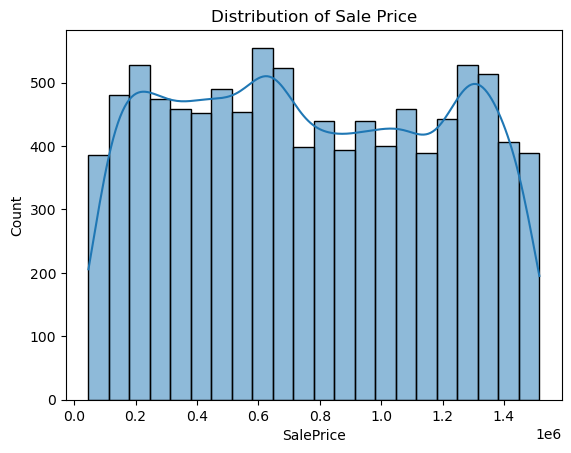

In [21]:
sns.histplot(df_augmented['SalePrice'], kde=True)
plt.title('Distribution of Sale Price')
plt.show()

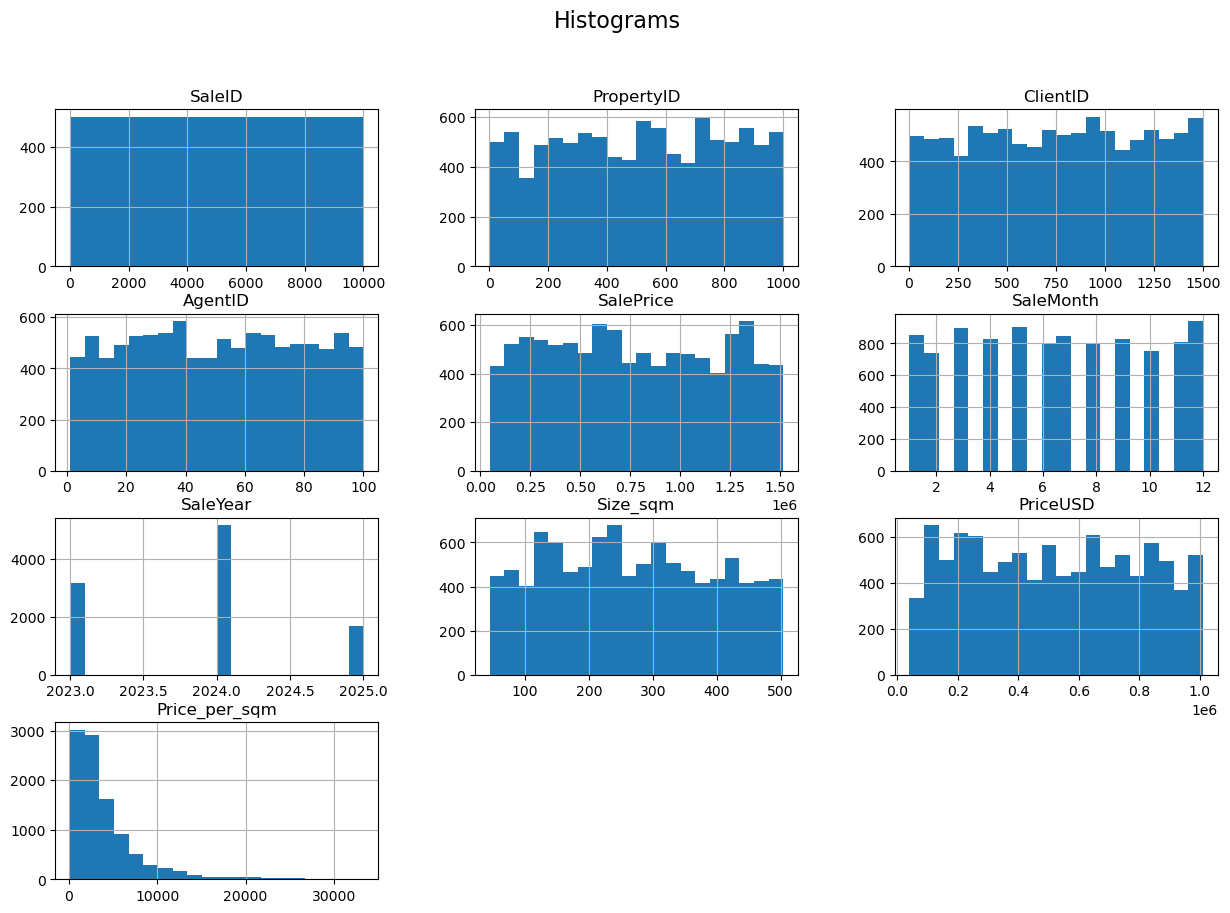

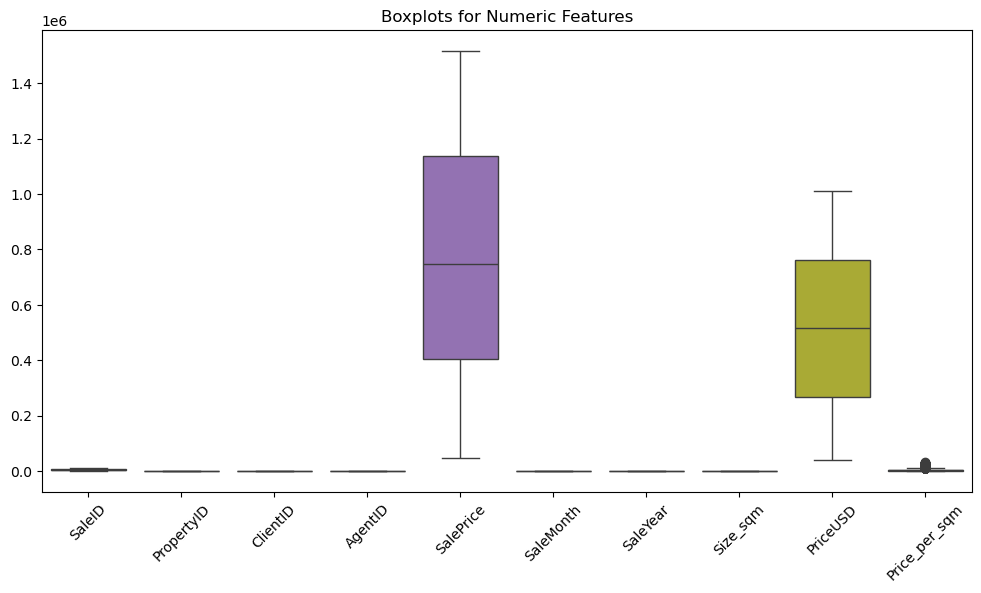

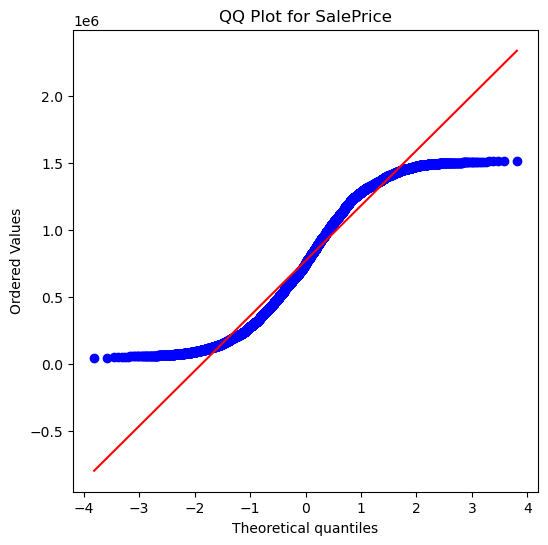

In [22]:
# Histograms for all numeric columns
df_augmented.hist(figsize=(15, 10), bins=20)
plt.suptitle("Histograms", fontsize=16)
plt.show()

# Boxplots for outlier detection
plt.figure(figsize=(12, 6))
sns.boxplot(data=df_augmented.select_dtypes(include=np.number))
plt.title("Boxplots for Numeric Features")
plt.xticks(rotation=45)
plt.show()

# QQ Plot
from scipy.stats import probplot
plt.figure(figsize=(6, 6))
probplot(df_augmented['SalePrice'], dist="norm", plot=plt)
plt.title("QQ Plot for SalePrice")
plt.show()

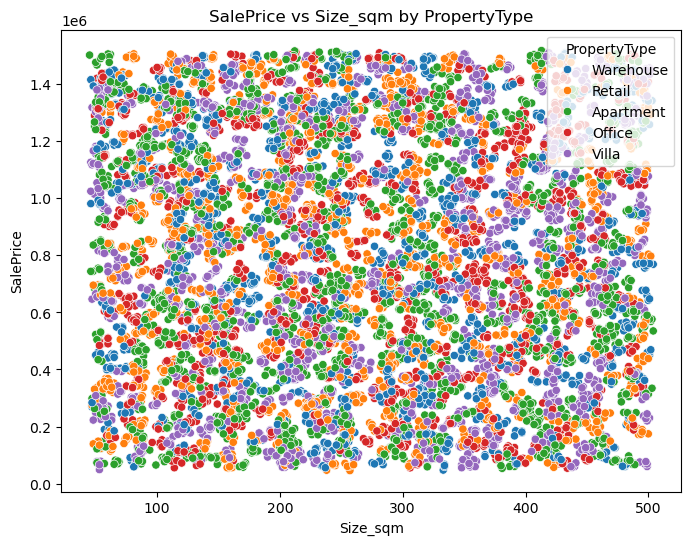

In [23]:
# Scatter plot - SalePrice vs Size_sqm
plt.figure(figsize=(8, 6))
sns.scatterplot(x='Size_sqm', y='SalePrice', hue='PropertyType', data=df_augmented)
plt.title("SalePrice vs Size_sqm by PropertyType")
plt.show()


In [24]:
# remove objects dtypes with more appropriate form

X_encoded = df_augmented.copy()
for col in X_encoded.select_dtypes(include='object').columns:
    X_encoded[col] = X_encoded[col].astype('category')


# picking features and targets

target = X_encoded['SalePrice'].astype(float)

X = X_encoded.drop('SalePrice', axis=1)
y = target

X.head(3)

,SaleID,PropertyID,ClientID,AgentID,SaleMonth,SaleYear,FirstName_x,LastName_x,Phone_x,Email_x,FirstName_y,LastName_y,Phone_y,Email_y,PropertyType,Location,Size_sqm,PriceUSD,Price_per_sqm,HighValueSale
0,1,891,291,70,2.0,2025.0,John,Schroeder,(701)136-6900x97927,elijahrichards@hotmail.com,Michael,Wyatt,+1-218-661-1607x986,istafford@brown-vasquez.com,Warehouse,Los Angeles,90.0,880449.0,6360.944444,False
1,2,886,1354,93,7.0,2024.0,Renee,House,+1-154-235-6053x785,shelly20@carter.com,Samantha,Vargas,(731)862-3921,kramerjohn@morgan.com,Retail,Miami,309.0,190809.0,2601.045307,True
2,3,372,702,43,1.0,2024.0,Melissa,Oneal,+1-560-674-2430x3593,robertvasquez@gonzalez.org,Mark,Matthews,667-735-4156,sabrina11@davis-peters.net,Warehouse,New York,120.0,493371.0,7006.408333,True


In [25]:
X.dtypes

SaleID              int64
PropertyID          int64
ClientID            int64
AgentID             int64
SaleMonth         float64
SaleYear          float64
FirstName_x      category
LastName_x       category
Phone_x          category
Email_x          category
FirstName_y      category
LastName_y       category
Phone_y          category
Email_y          category
PropertyType     category
Location         category
Size_sqm          float64
PriceUSD          float64
Price_per_sqm     float64
HighValueSale        bool
dtype: object

In [26]:
categories = X.select_dtypes(include='category')
categories.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 10 columns):
 #   Column        Non-Null Count  Dtype   
---  ------        --------------  -----   
 0   FirstName_x   10000 non-null  category
 1   LastName_x    10000 non-null  category
 2   Phone_x       10000 non-null  category
 3   Email_x       10000 non-null  category
 4   FirstName_y   10000 non-null  category
 5   LastName_y    10000 non-null  category
 6   Phone_y       10000 non-null  category
 7   Email_y       10000 non-null  category
 8   PropertyType  10000 non-null  category
 9   Location      10000 non-null  category
dtypes: category(10)
memory usage: 265.3 KB


In [27]:
# drop unnecessary columns
X = X.drop(['FirstName_x','LastName_x','Phone_x','Email_x',
            'FirstName_y','LastName_y','Phone_y','Email_y'], axis=1)


#convert categories into bool features for training
X = pd.get_dummies(X)
X.dtypes

SaleID                      int64
PropertyID                  int64
ClientID                    int64
AgentID                     int64
SaleMonth                 float64
SaleYear                  float64
Size_sqm                  float64
PriceUSD                  float64
Price_per_sqm             float64
HighValueSale                bool
PropertyType_Apartment       bool
PropertyType_Office          bool
PropertyType_Retail          bool
PropertyType_Villa           bool
PropertyType_Warehouse       bool
Location_Chicago             bool
Location_Houston             bool
Location_Los Angeles         bool
Location_Miami               bool
Location_New York            bool
dtype: object

In [28]:
# convert bools to int

bool_columns = [
    'HighValueSale',
    'PropertyType_Apartment',
    'PropertyType_Office',
    'PropertyType_Retail',
    'PropertyType_Villa',
    'PropertyType_Warehouse',
    'Location_Chicago',
    'Location_Houston',
    'Location_Los Angeles',
    'Location_Miami',
    'Location_New York'
]

X[bool_columns] = X[bool_columns].astype(int)

In [29]:
if isinstance(y, pd.Series):
    y_df = y.to_frame(name='Target')
else:
    y_df = pd.DataFrame(y, columns=['Target'])  # or change 'Target' to appropriate name

# Concatenate X and y into a new DataFrame (horizontally)
Xy_combined = pd.concat([X, y_df], axis=1)

# Select only numeric columns
numeric_combined = Xy_combined.select_dtypes(include='number')

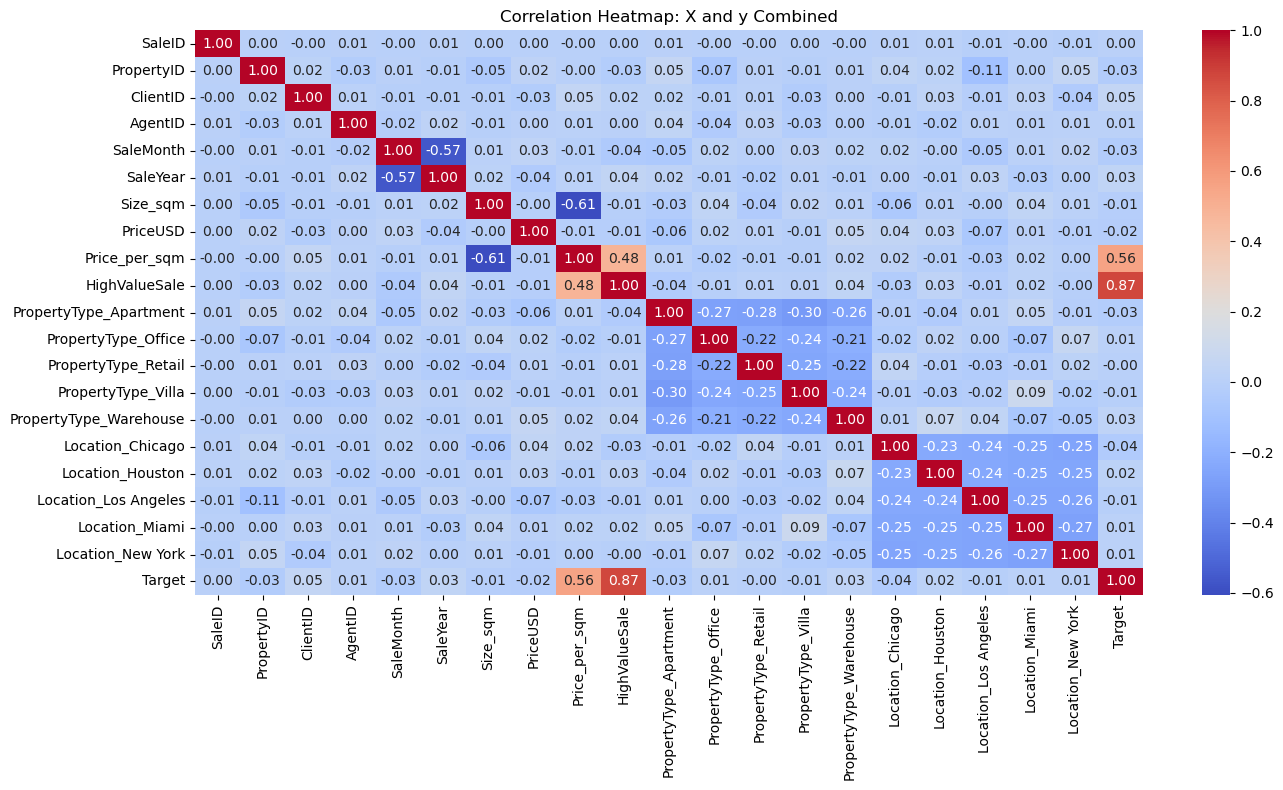

In [30]:
# Plot the correlation matrix
plt.figure(figsize=(14, 8))
sns.heatmap(numeric_combined.corr(), annot=True, cmap='coolwarm', fmt=".2f")
plt.title("Correlation Heatmap: X and y Combined")
plt.tight_layout()
plt.show()

In [31]:
y.shape

(10000,)

# 4- Label Encoding

In [33]:
scaler = MinMaxScaler()
X = scaler.fit_transform(X)
y = scaler.fit_transform(y.values.reshape(-1,1))

# 5- Predictive Training

In [35]:
# train model by 70% 30% then splitting validation into 15% and 15% testing

X_train, X_dummy, y_train, y_dummy = train_test_split(X,
                                                      y,
                                                      shuffle=True,
                                                      train_size=0.7,
                                                      random_state=42)

X_valid, X_test, y_valid, y_test = train_test_split(X_dummy,
                                                    y_dummy,
                                                    shuffle=True,
                                                    train_size=0.5,
                                                    random_state=42)

In [36]:
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_absolute_error as mae

estimate = [75,100,125,150,175,200]

for i in estimate:
    model = RandomForestRegressor(n_estimators=i, random_state=42)
    model.fit(X_train, y_train)
    predict = model.predict(X_valid)
    mean_abs = mae(y_valid, predict)
    print(f"n_estimators={i}, MAE={mean_abs:.4f}")



C:\Users\Sherif Amin\anaconda3\Lib\site-packages\sklearn\base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


n_estimators=75, MAE=0.0055


C:\Users\Sherif Amin\anaconda3\Lib\site-packages\sklearn\base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


n_estimators=100, MAE=0.0054


C:\Users\Sherif Amin\anaconda3\Lib\site-packages\sklearn\base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


n_estimators=125, MAE=0.0054


C:\Users\Sherif Amin\anaconda3\Lib\site-packages\sklearn\base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


n_estimators=150, MAE=0.0053


C:\Users\Sherif Amin\anaconda3\Lib\site-packages\sklearn\base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


n_estimators=175, MAE=0.0053


C:\Users\Sherif Amin\anaconda3\Lib\site-packages\sklearn\base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


n_estimators=200, MAE=0.0053


In [37]:
model = RandomForestRegressor(n_estimators=200, random_state=42)
model.fit(X_train, y_train)

C:\Users\Sherif Amin\anaconda3\Lib\site-packages\sklearn\base.py:1473: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  return fit_method(estimator, *args, **kwargs)


RandomForestRegressor(n_estimators=200, random_state=42)

# 6- Evaluation

In [39]:
# predict models using binary classification

y_pred = model.predict(X_test)

y_test_binary = (y_test > 0.5).astype(int)
y_pred_classes = (y_pred > 0.5).astype(int)

precision = precision_score(y_test_binary, y_pred_classes)
recall = recall_score(y_test_binary, y_pred_classes)
f1 = f1_score(y_test_binary, y_pred_classes)
r2 = r2_score(y_test_binary, y_pred_classes)

print(f"Precision score is: {precision}\nrecall score is: {recall}\nf1 score is: {f1}\nr2: {r2}")

Precision score is: 0.9857549857549858
recall score is: 0.9985569985569985
f1 score is: 0.9921146953405018
r2: 0.9704962530241341


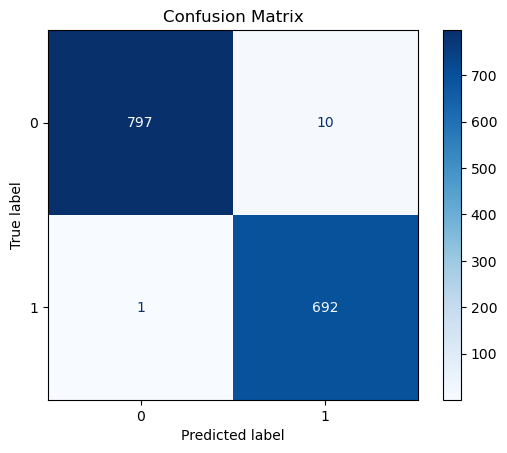

In [40]:
# ---------- 📊 CONFUSION MATRIX ----------
cm = confusion_matrix(y_test_binary, y_pred_classes)
disp = ConfusionMatrixDisplay(confusion_matrix=cm)
disp.plot(cmap=plt.cm.Blues)
plt.title("Confusion Matrix")
plt.show()

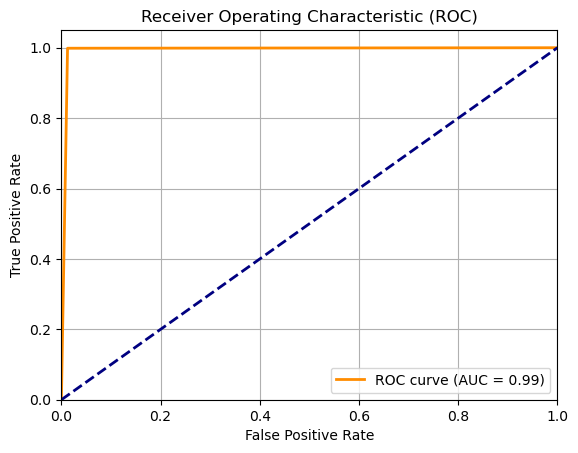

In [41]:
# ---------- 📈 ROC CURVE + AUC ----------
fpr, tpr, thresholds = roc_curve(y_test_binary, y_pred_classes)
roc_auc = auc(fpr, tpr)

plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')  # Diagonal
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC)')
plt.legend(loc="lower right")
plt.grid(True)
plt.show()

# 7-Recommendation System

In [42]:
df_sales_augmented = df_augmented.copy()

df_sales_augmented = df_sales_augmented[
    df_sales_augmented['ClientID'].isin(df_client['ClientID']) &
    df_sales_augmented['PropertyID'].isin(df_property['PropertyID']) &
    df_sales_augmented['AgentID'].isin(df_agent['AgentID'])
].reset_index(drop=True)

In [43]:
df_mf = df_sales_augmented[['ClientID', 'PropertyID']].copy()
df_mf['Score'] = df_sales_augmented['SalePrice'] / df_sales_augmented['SalePrice'].max()

In [44]:
df_mf.head()

,ClientID,PropertyID,Score
0,291,891,0.377797
1,1354,886,0.530397
2,702,372,0.554844
3,1269,505,0.899206
4,280,130,0.103870


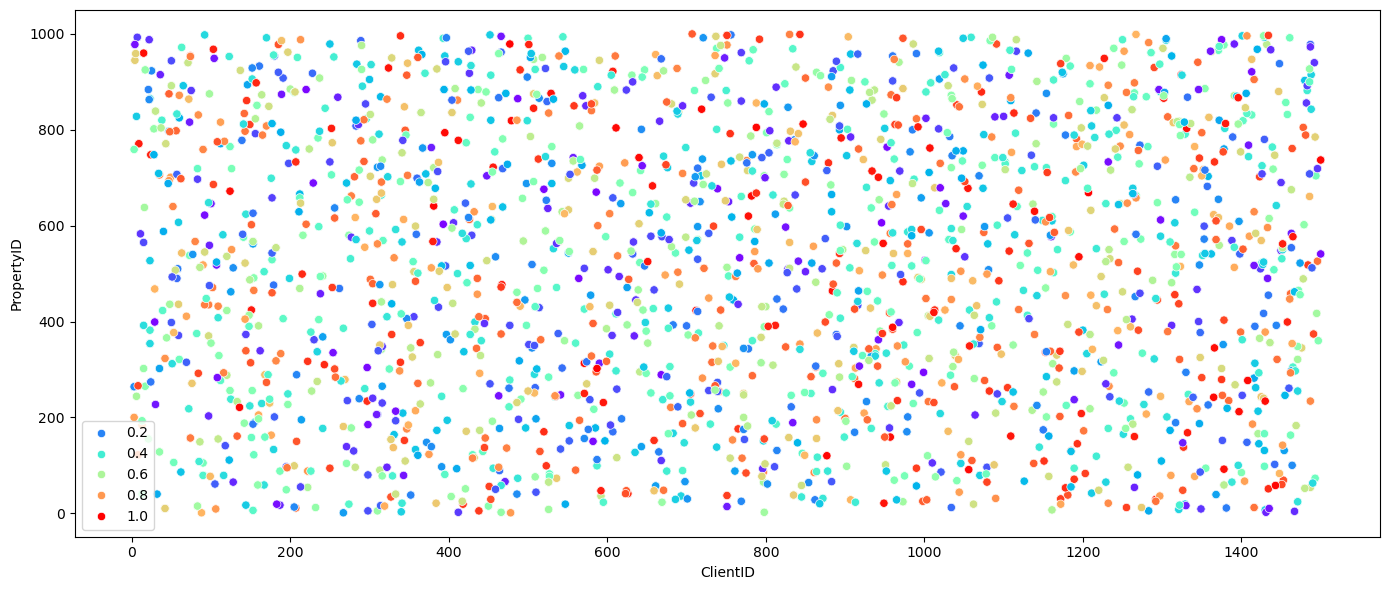

In [45]:
plt.figure(figsize=(14,6))
sns.scatterplot(data = df_mf, x='ClientID', y='PropertyID', hue='Score', palette='rainbow')
plt.legend()
plt.tight_layout()
plt.show()

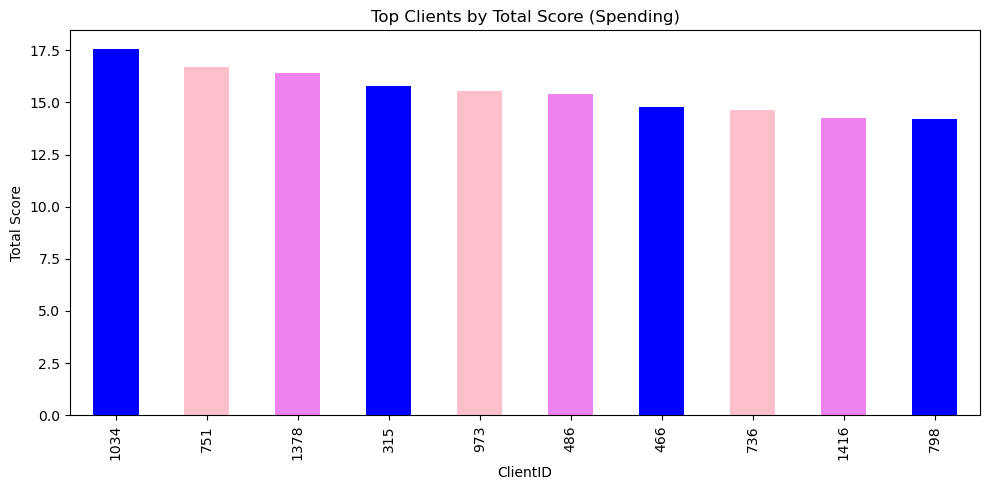

In [46]:
top_clients_total = df_mf.groupby('ClientID')['Score'].sum().sort_values(ascending = False).head(10)
top_clients_total.plot(kind='bar', figsize=(10, 5), title="Top Clients by Total Score (Spending)", color=['blue','pink','violet'])
plt.ylabel("Total Score")
plt.xlabel("ClientID")
plt.tight_layout()
plt.show()

In [69]:
!pip install torch
from sklearn.preprocessing import LabelEncoder
import torch

user_enc = LabelEncoder()
item_enc = LabelEncoder()

df_mf['user'] = user_enc.fit_transform(df_mf['ClientID'])
df_mf['item'] = item_enc.fit_transform(df_mf['PropertyID'])

#convert to tensors
user_tensor = torch.LongTensor(df_mf['user'].values)
item_tensor = torch.LongTensor(df_mf['item'].values)
score_tensor = torch.FloatTensor(df_mf['Score'].values)

In [57]:
#define the matrix factorization model
import torch.nn as nn

class RetailMF(nn.Module):
    def __init__(self, n_users, n_items, n_factors = 30):
        super().__init__()
        self.user_emb = nn.Embedding(n_users, n_factors)
        self.item_emb = nn.Embedding(n_items, n_factors)
        self.user_emb.weight.data.uniform_(0,0.05)
        self.item_emb.weight.data.uniform_(0,0.05)

    def forward(self, user, item):
        return (self.user_emb(user) * self.item_emb(item)).sum(1)

In [96]:
#train the recommendation system model
model = RetailMF(
    n_users = len(user_enc.classes_),
    n_items =len(item_enc.classes_)
)

optimizer = torch.optim.Adam(model.parameters(), lr=0.01)
loss_fn = nn.MSELoss()

#training loop
epochs = 100
for epoch in range(epochs):
    model.train()
    optimizer.zero_grad()
    preds = model(user_tensor, item_tensor)
    loss = loss_fn(preds, score_tensor)
    loss.backward()
    optimizer.step()
    print(f"Epoch {epoch+1}: Loss = {loss.item():.4f}")

Epoch 1: Loss = 0.3163
Epoch 2: Loss = 0.2990
Epoch 3: Loss = 0.2771
Epoch 4: Loss = 0.2514
Epoch 5: Loss = 0.2228
Epoch 6: Loss = 0.1924
Epoch 7: Loss = 0.1615
Epoch 8: Loss = 0.1316
Epoch 9: Loss = 0.1043
Epoch 10: Loss = 0.0810
Epoch 11: Loss = 0.0630
Epoch 12: Loss = 0.0506
Epoch 13: Loss = 0.0436
Epoch 14: Loss = 0.0408
Epoch 15: Loss = 0.0408
Epoch 16: Loss = 0.0419
Epoch 17: Loss = 0.0426
Epoch 18: Loss = 0.0421
Epoch 19: Loss = 0.0401
Epoch 20: Loss = 0.0368
Epoch 21: Loss = 0.0328
Epoch 22: Loss = 0.0288
Epoch 23: Loss = 0.0253
Epoch 24: Loss = 0.0226
Epoch 25: Loss = 0.0208
Epoch 26: Loss = 0.0198
Epoch 27: Loss = 0.0193
Epoch 28: Loss = 0.0190
Epoch 29: Loss = 0.0188
Epoch 30: Loss = 0.0185
Epoch 31: Loss = 0.0179
Epoch 32: Loss = 0.0171
Epoch 33: Loss = 0.0160
Epoch 34: Loss = 0.0149
Epoch 35: Loss = 0.0137
Epoch 36: Loss = 0.0125
Epoch 37: Loss = 0.0115
Epoch 38: Loss = 0.0105
Epoch 39: Loss = 0.0098
Epoch 40: Loss = 0.0091
Epoch 41: Loss = 0.0086
Epoch 42: Loss = 0.0080
E

In [102]:
def recommend_for_client(client_id, top_n=5):
    model.eval()
    if client_id not in user_enc.classes_:
        print("Client not found.")
        return pd.DataFrame()

    encoded_user = user_enc.transform([client_id])[0]
    product_ids = torch.LongTensor(range(len(item_enc.classes_)))
    client_tensor = torch.LongTensor([encoded_user] * len(product_ids))

    with torch.no_grad():
        scores = model(client_tensor, product_ids)

    top_indices = torch.topk(scores, top_n).indices
    recommended_encoded_items = top_indices.numpy()
    recommended_product_ids = item_enc.inverse_transform(recommended_encoded_items)

    return df_property[df_property['PropertyID'].isin(recommended_product_ids)]

# Example usage:
recommend_for_client(client_id=142, top_n=5)

,PropertyID,PropertyType,Location,Size_sqm,PriceUSD
448,449,Retail,New York,207,425772
467,468,Apartment,Houston,409,649761
595,596,Office,Miami,254,451812
740,741,Apartment,New York,465,694148
921,922,Warehouse,New York,159,98007


# 8-Save The Model

In [ ]:
y_prediction = model.predict(X)

df_augmented['Sale Prediction'] = y_prediction * df_augmented['SalePrice'].max()

In [ ]:
df_augmented

In [ ]:
df_augmented.to_excel('Real-Estate-Dataset.xlsx', index = False)